# `listen` Example

### Earth-Sun Observation with LUVOIR/LUMOS

In [1]:
%matplotlib inline

import sys, os
import matplotlib.pyplot as plt

sys.path.insert(1, os.path.dirname(os.path.abspath(".")))
import listen

Choose a LUMOS mode:

In [2]:
mode = listen.LumosMode.G300M()

Plot all of the channel specifications:

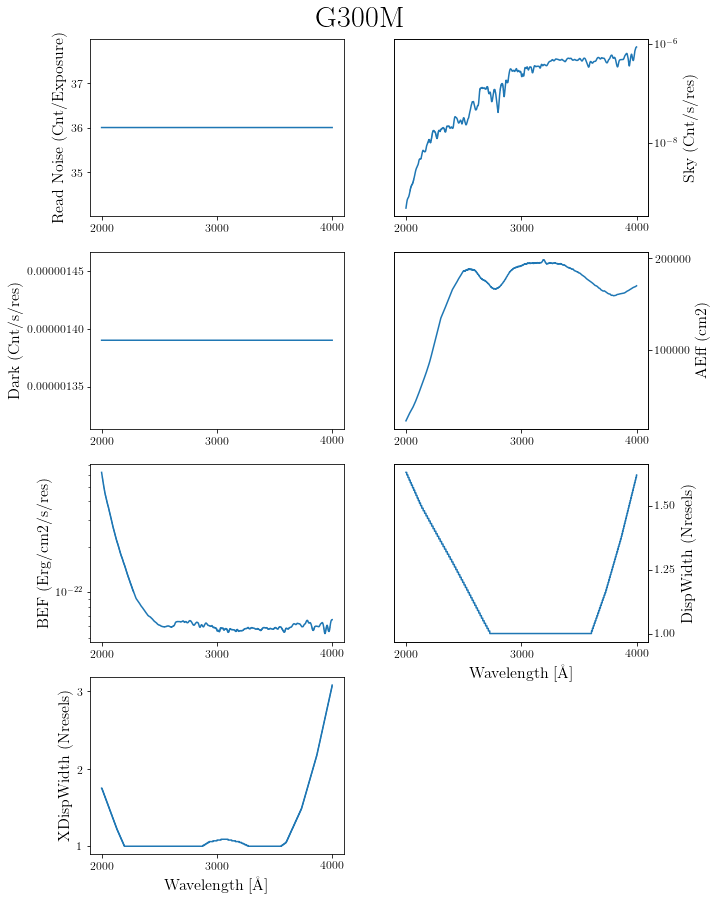

In [3]:
fig, ax = mode.plot_all(title="G300M")

Create a star-planet `System` object that will contain of the the parameters associated with the star and planet. The default system is instantiated with the Earth-Sun parameters. 

In [4]:
system = listen.System(d = 10.0, a = 1.0, Rp = 1.0, Rs = 1.0, 
                       tdur = 8.0 * 3600, Tstar = 5780)

Create a `Telescope` object that will contain all of the relevant telescope parameters, including the `LumosMode` that we already created.

In [5]:
telescope = listen.Telescope(A=134.8, tput=0.32, mode = mode)

Create an `Observation` that will use the `Telescope` to `observe` the `System`.

In [6]:
obs = listen.Observation(telescope, system)

Now let's read-in the example files for the Earth:

In [7]:
trn = listen.utils.Trnst("../scripts/earth_standard_icrccm.trnst")
rad = listen.utils.Rad("../scripts/earth_standard_icrccm_toa.rad")

We'll want to make sure that the planet's transit depth spectrum is on the same wavelength grid as the stellar flux:

In [8]:
if len(trn.lam) < len(rad.lam):
    mask = (rad.lam >= trn.lam.min()) & (rad.lam <= trn.lam.max())
elif len(trn.lam) > len(rad.lam):
    mask = (trn.lam >= rad.lam.min()) & (trn.lam <= rad.lam.max())
else:
    mask = np.array([True for i in trn.lam])

# Get arrays
lam = trn.lam
tdepth = trn.tdepth
absrad = trn.absrad
sflux = rad.sflux[mask]

Now, we can call `observe` to make the calculation. Here you can set the number of transits to "stack" (via `nocc`) and the number of transit durations to observe out-of-transit (via `nout`). 

In [9]:
obs.observe(lam, tdepth, sflux=sflux, nocc = 1, nout = 1)

Plot the SNR at the native spectral resolution

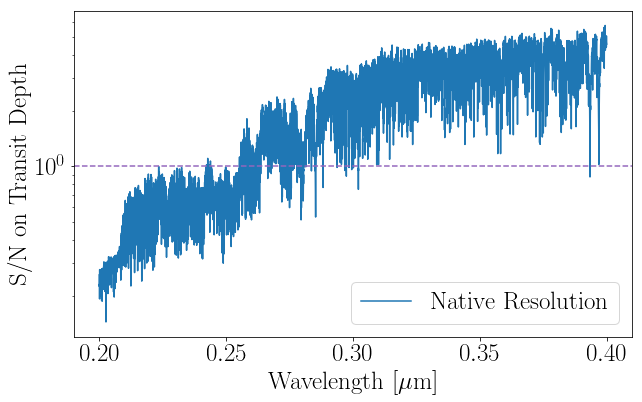

In [10]:
fig, ax = obs.plot_SNR()

Plot the spectrum at the native resolution

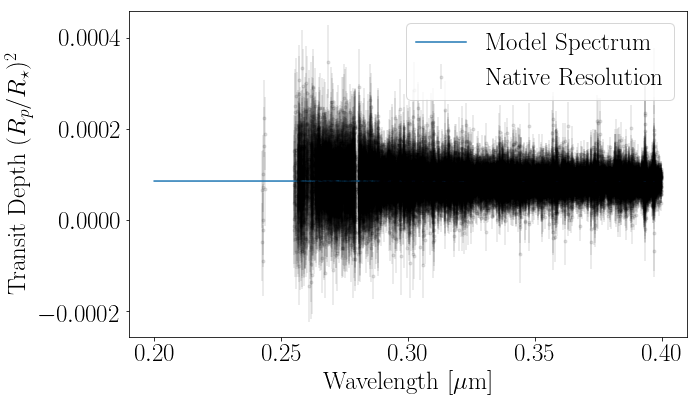

In [11]:
fig, ax = obs.plot_spectrum(SNRcut=1.0)

Plot the maximally binned spectrum

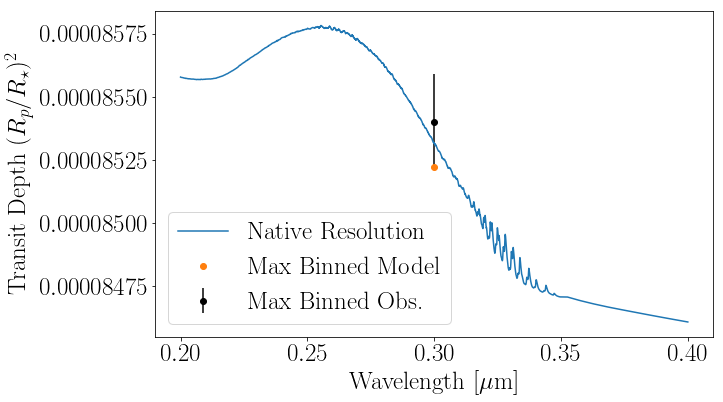

In [12]:
fig, ax = obs.plot_max_binning_spectrum()

Rebin by a large factor to boost SNR and try to resolve features in the spectrum

In [13]:
obs.rebin_spectrum(bfactor=1e4)

Number of binned points : 3


Plot the binned SNR

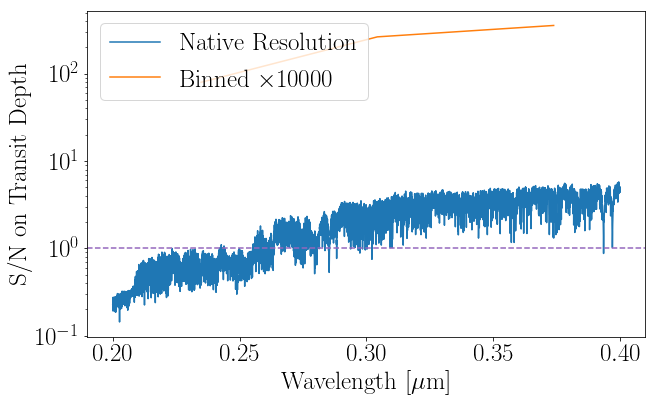

In [14]:
fig, ax = obs.plot_SNR(use_binned = True)

Plot the binned spectrum

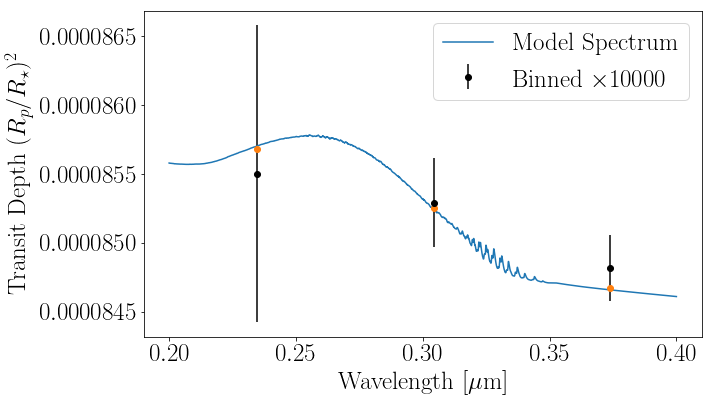

In [15]:
fig, ax = obs.plot_spectrum(use_binned = True)